# Machine Learning Modelling with Python

# Clustering

Anda bekerja sebagai seorang data analyst di sebuah LSM Internasional. Anda diminta untuk 
membuat sebuah algoritma clustering untuk mengelompokkan negara berdasarkan faktor 
sosial-ekonomi dan kesehatan mereka. Data ini disimpan dalam file dengan nama “Country
data.csv”. Dataset ini berisi 167 observasi dan 10 fitur yang menggambarkan data dari LSM 
Kemanusiaan Internasional. Tujuan dari analisis ini adalah untuk mengelompokkan negara
negara guna mengetahui negara mana yang memerlukan bantuan berdasarkan faktor-faktor 
yang menentukan perkembangan keseluruhan negara

Keterangan data sebagai berikut
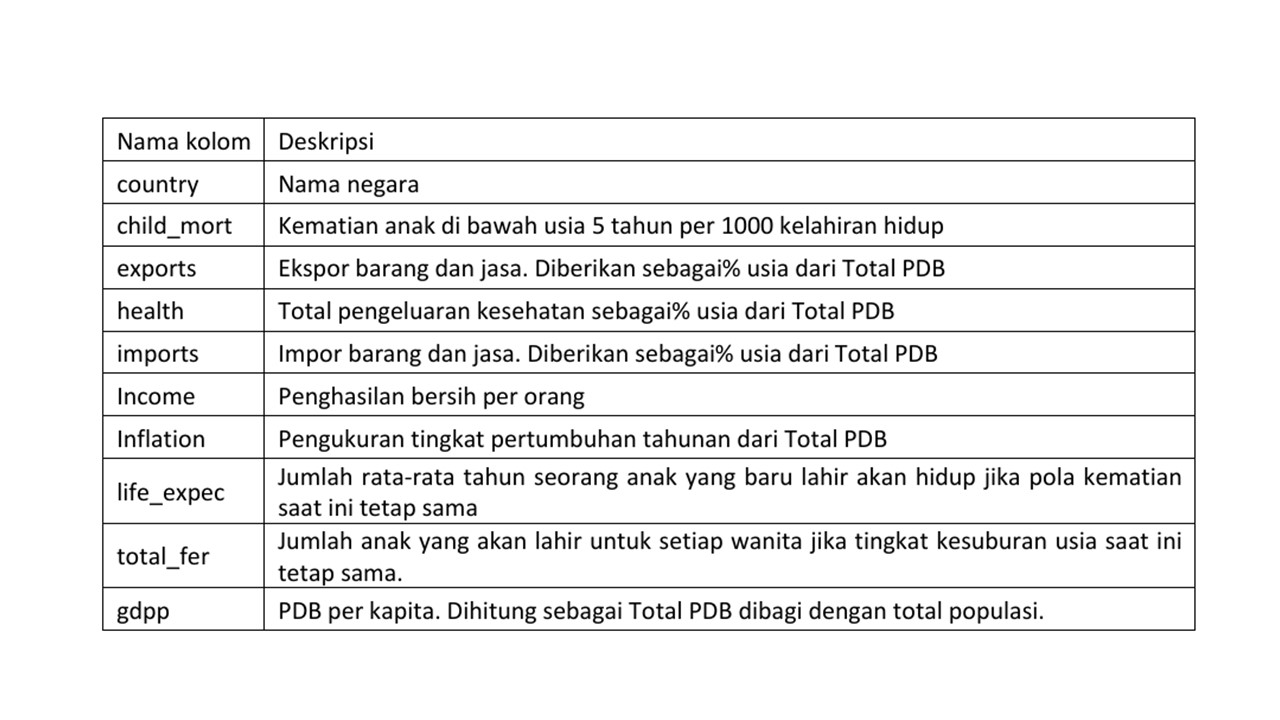

Silahkan lakukan Business understanding
1...
2...
dst


Dan tentukan pemodelan machine learning seperti apa yang sesuai

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

EDA terdiri atas
ganti


In [3]:
#Memahami Data

df= pd.read_csv('Country-data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Melakukan cek data 

In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.duplicated().sum()

0

Pre-processing data

1. Penanganan Missing value (tidak diperlukan)
2. Penangan format data tidak sesuai (tidak diperlukan)
3. Cek outlier (tidak diperlukan)
4. Membuang fitur yang tidak diperlukan
4. encoding targeted output
5. standarisasi data



In [6]:
# Drop kolom yang tidak diperlukan, dalam kasus ini country tidak digunakan(merupakan identifier)
df_clean = df.copy()
df_clean.drop('country',axis=1,inplace=True)

In [7]:
df_clean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_clean)
df_clean = scaler.transform(df_clean)


## Optimal cluster Selection

In [9]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)

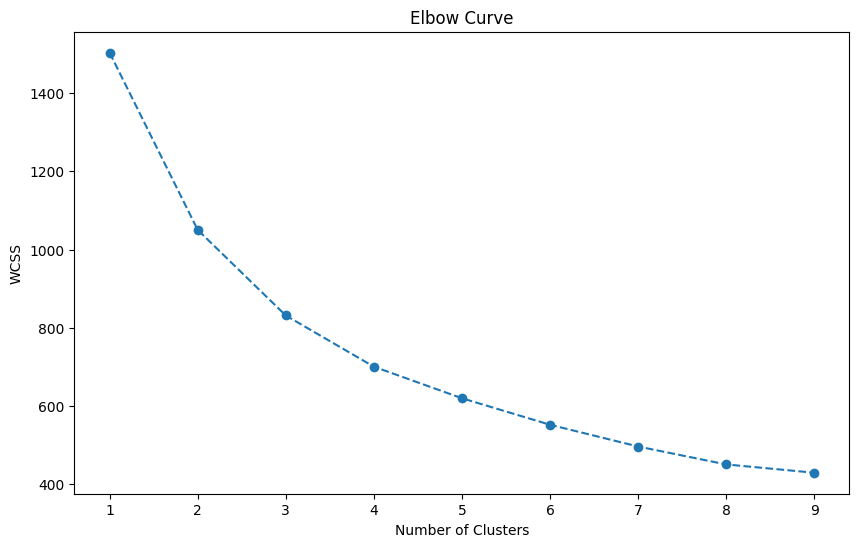

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Clustering Optimal

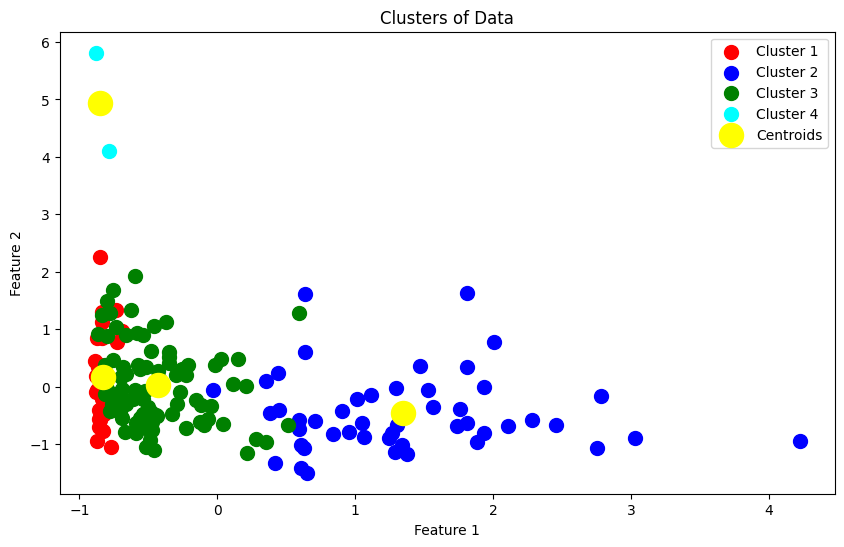

In [11]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_clean)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_clean[y_kmeans == 0, 0], df_clean[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_clean[y_kmeans == 1, 0], df_clean[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_clean[y_kmeans == 2, 0], df_clean[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_clean[y_kmeans == 3, 0], df_clean[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Penggunaan PCA untuk dimentional Reduction

In [12]:
# PCA
pca = PCA()
df_pca = pca.fit_transform(df_clean)
cev = pca.explained_variance_.cumsum()/10
n_components = np.argmax(cev>=0.8)+1 # Implementasikan 80% data
print("Jumlah komponen setalh mengambil minimal cumulative variance sebesar 80% :",n_components)
print("cumulative variance: ",cev)

# Menggunakan hasl pca untuk clustering berikut
pca = PCA(n_components=4)
df_reduced = pca.fit_transform(df_clean)

Jumlah komponen setalh mengambil minimal cumulative variance sebesar 80% : 5
cumulative variance:  [0.41605702 0.57162318 0.68936656 0.78944429 0.85590415 0.87839695
 0.88980916 0.8986939  0.90542169]


In [13]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(df_reduced)
    wcss.append(kmeans.inertia_)

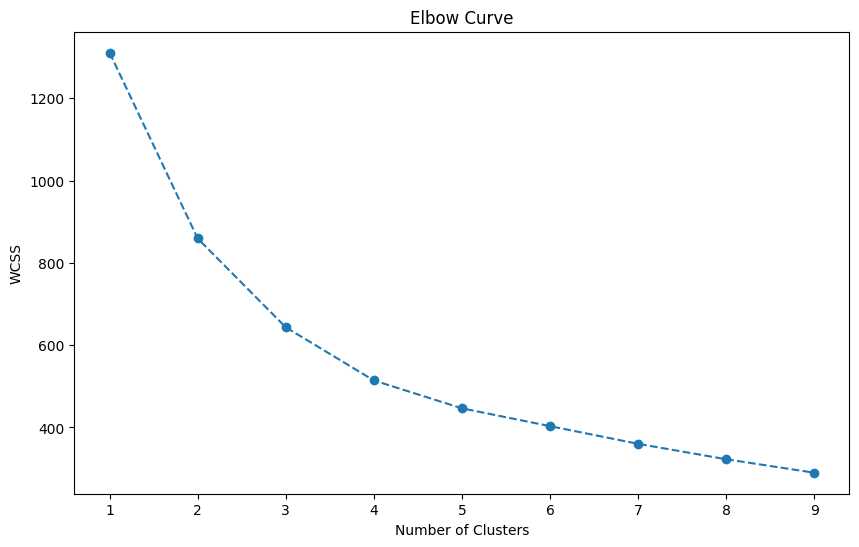

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

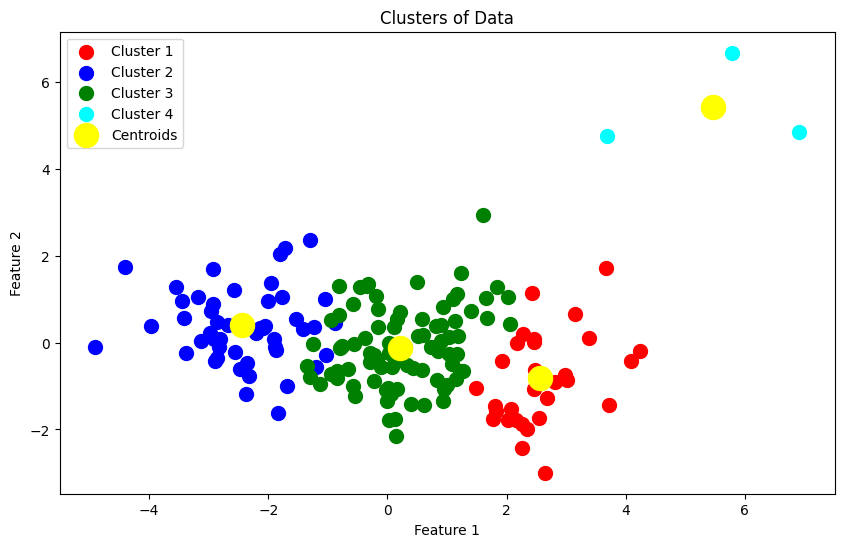

In [15]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans2 = kmeans.fit_predict(df_reduced)

#km = KMeans(n_clusters=3, random_state=0)
#km.fit_transform(X)
#df_reduced.loc[:,"cluster"] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_reduced[y_kmeans == 0, 0], df_reduced[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_reduced[y_kmeans == 1, 0], df_reduced[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_reduced[y_kmeans == 2, 0], df_reduced[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_reduced[y_kmeans == 3, 0], df_reduced[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## analisa cluster

In [16]:
#menambahkan hasil clustering dalam dataframe sebagai label
df['cluster'] = pd.Series(y_kmeans2, index=df.index)

In [17]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [18]:
#melihat faktor yang paling penting dalam proses clustering
X = df.drop(['cluster','country'], axis=1)
y = df["cluster"]

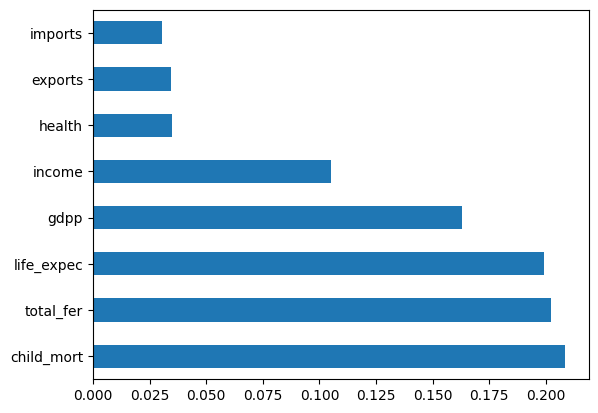

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

## Analisa
1. Dapat diperlijatkan bahwa child_mort adalah fitur yang paling penting dalam melihat aspek keputusan pengelompokan negara
2. child mort, life expec, gdpp, dapat dijadikan salah satu parameter melihat negara mana yang paling harus diperhatikan untuk diberikan bantuan
3. salah satu contoh intepretasi, untuk negara yang masuk dalam child_mort tinggi maka masuk dalam golongan negara yang harus diperhatikan. maka cek deskriptif statistik berdasarkan kelas clusternya.

In [20]:
#analisa deskriptif dari tiap cluster
df.groupby('cluster').describe()

child_mort                                                          \
             count       mean        std   min     25%   50%    75%    max   
cluster                                                                      
0              3.0   4.133333   2.309401   2.8   2.800   2.8    4.8    6.8   
1             86.0  21.598837  13.763306   4.5  11.275  18.1   27.9   64.4   
2             31.0   4.903226   2.141103   2.6   3.700   4.2    5.0   10.8   
3             47.0  92.961702  33.375229  36.9  63.800  90.2  111.0  208.0   

        exports              ... total_fer        gdpp                \
          count        mean  ...       75%   max count          mean   
cluster                      ...                                       
0           3.0  176.000000  ...    1.4950  1.63   3.0  57566.666667   
1          86.0   41.003360  ...    2.6575  4.34  86.0   6769.325581   
2          31.0   46.477419  ...    1.9650  3.03  31.0  42574.193548   
3          47.0   29.151277  ...    5.6350  7.49  47.0   1922.382979   

                                                                     
                  std      min      25%      50%      75%       max  
cluster                                                              
0        43011.665084  21100.0  33850.0  46600.0  75800.0  105000.0  
1         5302.891212    592.0   2970.0   4850.0   9992.5   28000.0  
2        15379.531153  19800.0  32250.0  41800.0  48550.0   87800.0  
3         2956.103925    231.0    550.0    897.0   1470.0   17100.0  

[4 rows x 72 columns]

## Kesimpulan
Negara Negara yang berada pada cluster 3, merupakan negara2 yang perlu diperhatikan untuk mendapatkan bantuan

In [21]:
df['cluster'] = 3
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3
